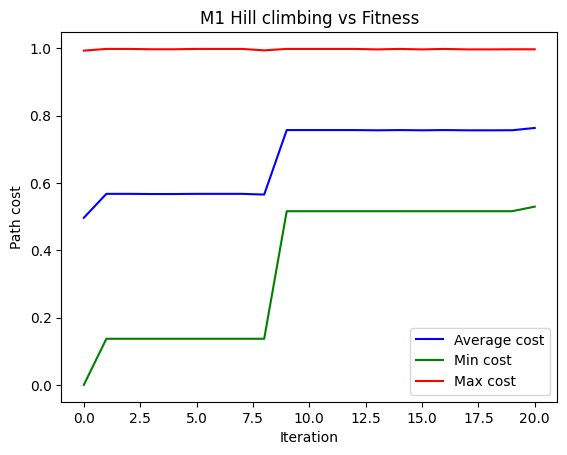

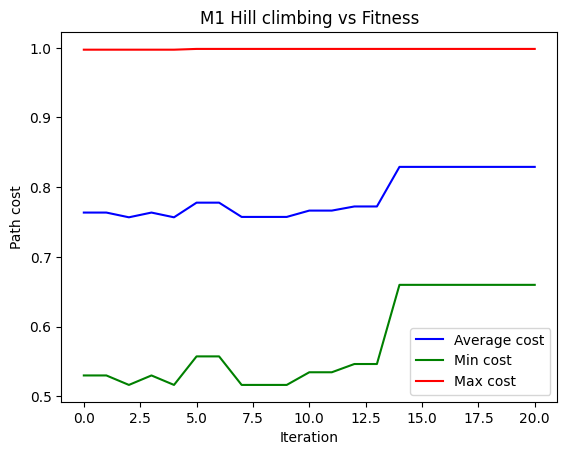

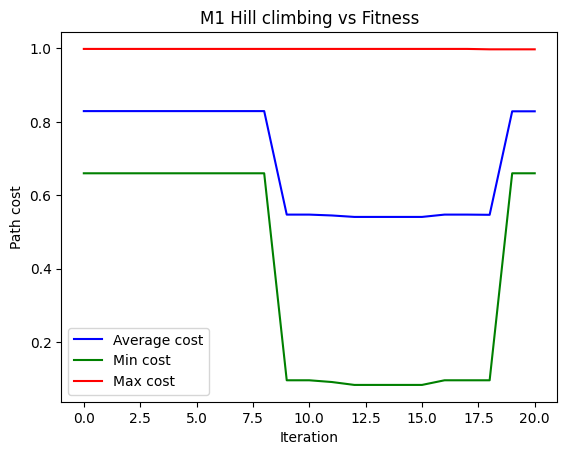

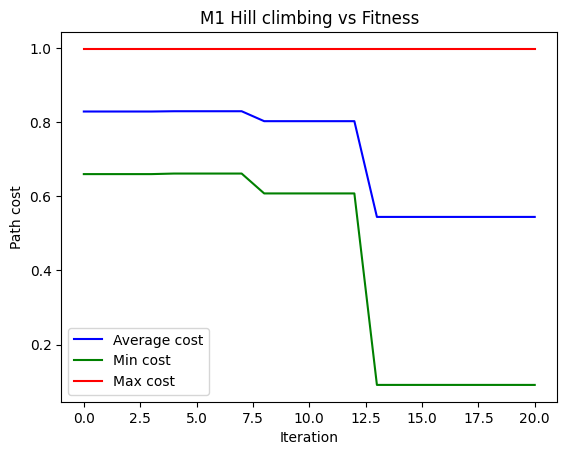

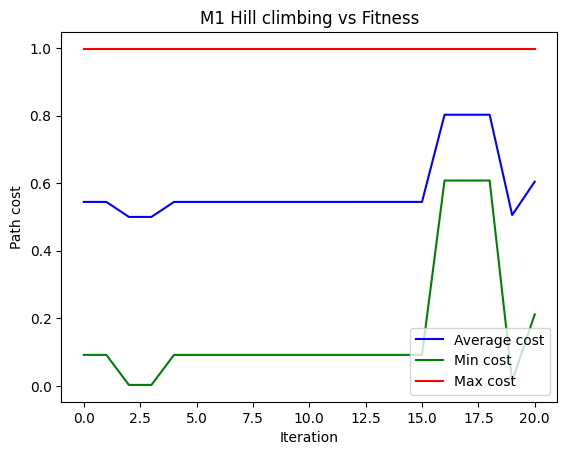

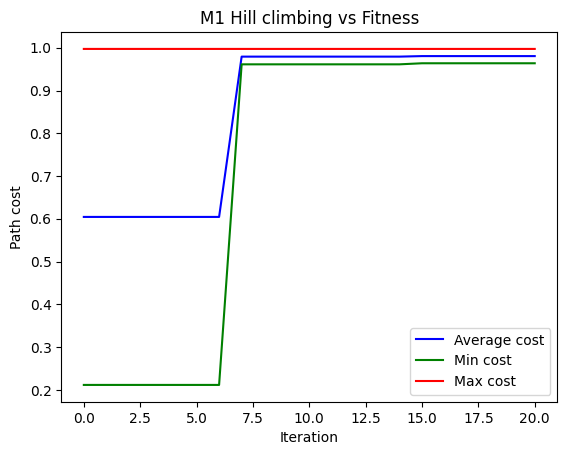

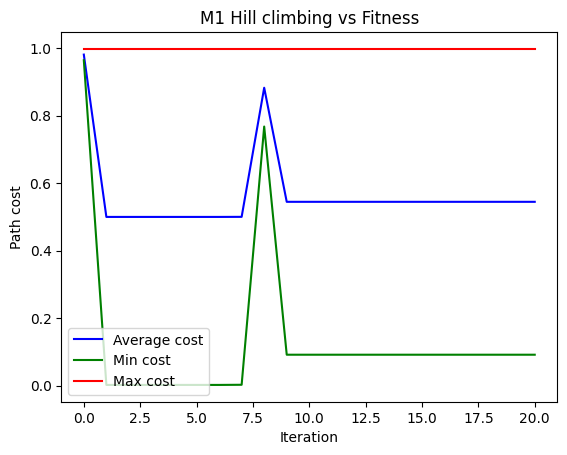

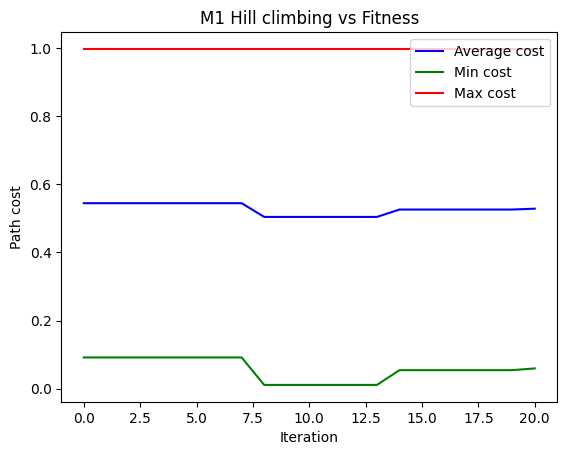

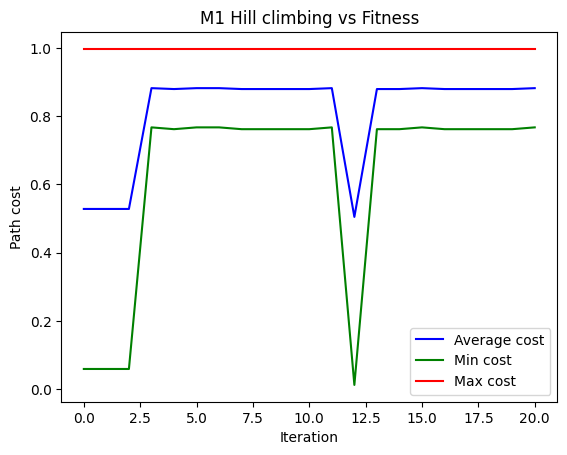

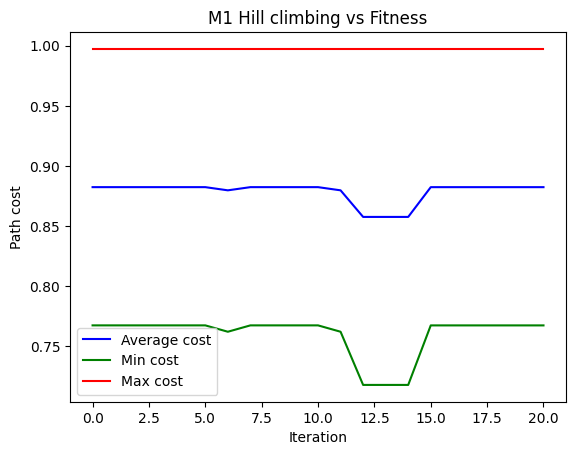

0.9973107513910344
0.9984042497816701
0.9972999956989387
0.9972999956989387
0.9972999956989387
0.9972999956989387
0.9972999956989387
0.9972999956989387
0.9972999956989387
0.9972999956989387


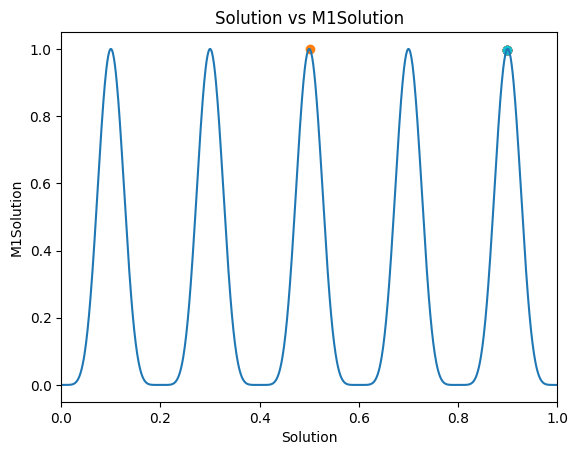

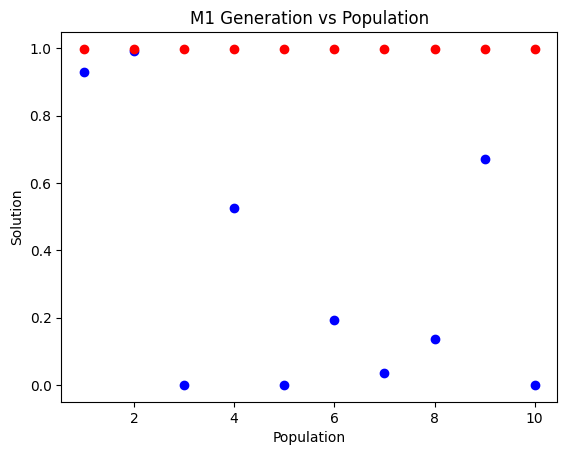

In [26]:
%run GeneticAlgorithmM1HillClimbing.py


Max original solution:  0.9283667175927959

Max final solution:  0.92578125


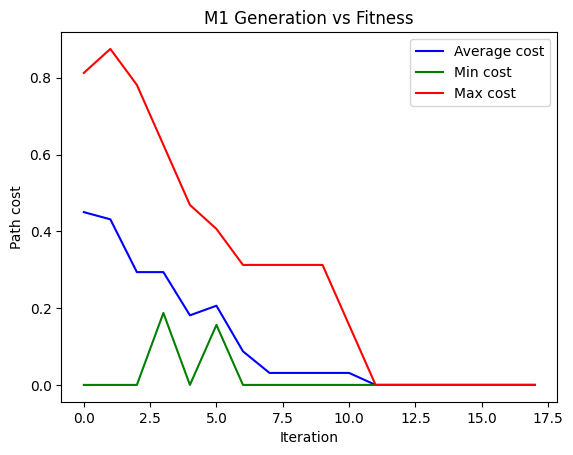

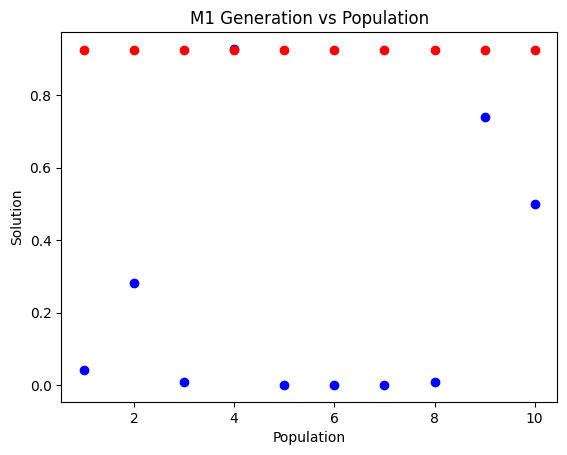

In [5]:
%run GeneticAlgorithmM1Crowding.py


Max original solution:  0.552542431391669

Max final solution:  0.5523161888122559


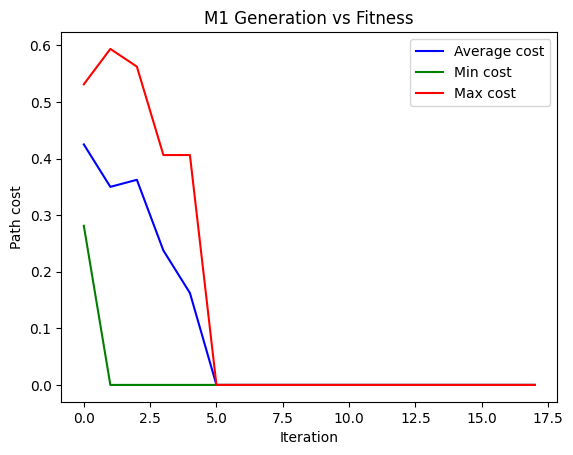

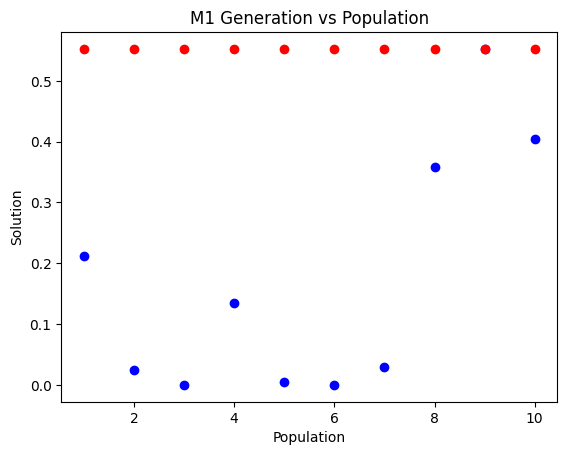

In [2]:
%run GeneticAlgorithmM4Crowding.py

In [6]:
from random import randrange
from random import randint
import math
import struct
from scipy.spatial.distance import hamming
import sys

mutationRate = 0
crossoverRate = 0
populationSize = 10
numOfGenerations = 20

fMaxList = []
fMinList = []
fAverageList = []

def float_to_bin(num):
    return ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', num))

def bin_to_float(binary):
    return struct.unpack('!f',struct.pack('!I', int(binary, 2)))[0]

def M1(x):
    return (math.sin(5*math.pi*x))**6

def GenerateRandomSolutions(variables, solutions):
    while len(solutions) < populationSize:
        newVar = randrange(1,101)/100
        variables.append(newVar)
        solutions.append(M1(newVar))
        
def DetermineBest(solutions):
    bestSolutions = []
    
    minHammingDistance = sys.float_info.max
    maxSolution1 = 0.0
    maxSolution2 = 0.0
        
    for solution1 in solutions:
        for solution2 in solutions:
            tempHammingDistance = hamming(list(float_to_bin(solution1)), list(float_to_bin(solution2)))
            if(tempHammingDistance < minHammingDistance and solution1 != solution2):
                minHammingDistance = tempHammingDistance
                maxSolution1 = solution1   
                maxSolution2 = solution2
    
    bestSolutions.append(maxSolution1)
    bestSolutions.append(maxSolution2)
    
    return bestSolutions


#Crossover is currently looking for max solutions
def Crossover(solution1, solution2):
    if(randint(1,100)/100 > crossoverRate):
        #Sets float solutions to 32 bit binary strings
        binSol1 = float_to_bin(solution1)
        binSol2 = float_to_bin(solution2)
    
        #Make new var out of the first half of the first solution and the second half of the second solution
        if(solution1 >= solution2):
            newBinSol = binSol1[:16] + binSol2[16:]
            newSolution = bin_to_float(newBinSol)
    
            return newSolution
    
        else:
            newBinSol = binSol2[:16] + binSol1[16:]
            newSolution = bin_to_float(newBinSol)
    
            return newSolution
    else:
        return solution1
    
def Mutate(solution):
    if(randint(1,100)/100 > mutationRate):
        solutionBin = float_to_bin(solution)
        
        solutionList = list(solutionBin)
        randomIndex = randint(16, 31)
        
        if(solutionList[randomIndex] == "1"):
            solutionList[randomIndex]  == "0"
            
        elif(solutionList[randomIndex] == "0"):
            solutionList[randomIndex]  == "1"
            
        return "".join(solutionList)
        
    else:
        return solution

#Clean population to start with new solutions
def CleanPopulation(variables, solutions):
    maxSolution = max(solutions)
    solutions.clear()
    solutions.append(maxSolution)
    variables.clear()
    GenerateRandomSolutions(variables, solutions)

def Crowding(variables, solutions):
    
    fitnessList = []
    alreadyCrossedOverList = []
    
    # breakWhileLoop = false;
    
    # while !breakWhileLoop:
    randomInt1 = randint(0, 9)
    randomInt2 = randint(0, 9)
    
    # print("This is random int 1: ", randomInt1)
    # print("This is random int 2: ", randomInt2)
    
    alreadyCrossedOverCount = 0

    while len(alreadyCrossedOverList) < 10:
        if(randomInt1 in alreadyCrossedOverList):
            randomInt1 = randint(0, 9)
        elif(randomInt2 in alreadyCrossedOverList):
            randomInt2 = randint(0, 9)
        elif(randomInt1 == randomInt2):
            randomInt2 = randint(0, 9)            
        else:
            # print("Got through!")
            #Crossover event 
            newSolution1 = Crossover(solutions[randomInt1], solutions[randomInt2])
            newSolution2 = Crossover(solutions[randomInt2], solutions[randomInt1])
        
            #Mutate event
            Mutate(newSolution1)
            Mutate(newSolution2)
        
            hamming1 = hamming(list(float_to_bin(solutions[randomInt1])), list(float_to_bin(newSolution1))) + hamming(list(float_to_bin(solutions[randomInt2])), list(float_to_bin(newSolution2))) 
            hamming2 = hamming(list(float_to_bin(solutions[randomInt2])), list(float_to_bin(newSolution1))) + hamming(list(float_to_bin(solutions[randomInt1])), list(float_to_bin(newSolution2))) 
        
            fitnessList.append(hamming1)
            fitnessList.append(hamming2)    
        
            if(hamming1 <= hamming2):
                solutions[randomInt1] = newSolution1
                solutions[randomInt2] = newSolution2
            else:
                solutions[randomInt1] = newSolution2
                solutions[randomInt2] = newSolution1
                
            alreadyCrossedOverList.append(randomInt1)
            alreadyCrossedOverList.append(randomInt2)
            
            alreadyCrossedOverCount = alreadyCrossedOverCount + 2

    fAverageList.append(sum(fitnessList)/len(fitnessList))
    fMaxList.append(max(fitnessList))
    fMinList.append(min(fitnessList))
    
    # print("This is fitness list: ",fitnessList)
    
    fitnessList.clear()
    
def Sequential(variables, solutions):
    
    

In [33]:
variables = []
solutions = []

#Initial population generation (size is 20)
GenerateRandomSolutions(variables, solutions)

In [34]:
variables

[0.81, 0.92, 0.84, 0.68, 0.64, 0.3, 0.44, 0.34, 0.66, 0.62]

In [35]:
solutions

[1.4655297809620022e-05,
 0.7400106214843429,
 0.041239378515657676,
 0.7400106214843414,
 0.041239378515657725,
 1.0,
 0.04123937851565777,
 0.28037924859373714,
 0.2803792485937365,
 0.0008707514062631378]

In [36]:
originalSolutions = solutions.copy()

In [37]:
tempSolutions = DetermineBest(solutions)

In [38]:
tempSolutions

[0.7400106214843429, 0.7400106214843414]

In [14]:
count = 1

maxOriginalSolution = max(solutions)

In [15]:
maxOriginalSolution

1.0

In [16]:
while(count < (numOfGenerations-1)):
    
    Crowding(variables, solutions)    
    
    count = count + 1

In [17]:
tempSolutions = DetermineBest(solutions)

In [19]:
solutions

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [20]:
print("\nMax original solution: ", maxOriginalSolution)
print("\nMax final solution: ", max(solutions))

generationList = [x for x in range(1, numOfGenerations+1)]


Max original solution:  1.0

Max final solution:  1.0


In [21]:
generationList

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Max original solution:  0.9283667175927959

Max final solution:  0.927539050579071


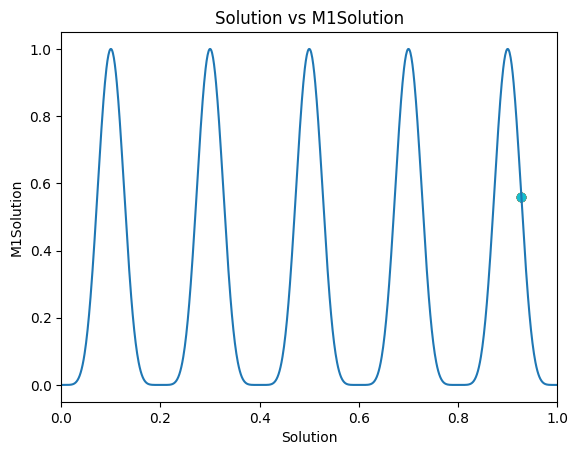

In [32]:
variables = []
solutions = []

#Initial population generation (size is 20)
GenerateRandomSolutions(variables, solutions)

originalSolutions = solutions.copy()

tempSolutions = DetermineBest(solutions)

count = 1

maxOriginalSolution = max(solutions)

while(count < (numOfGenerations-1)):
    
    Crowding(variables, solutions)    
    
    count = count + 1

tempSolutions = DetermineBest(solutions)

print("\nMax original solution: ", maxOriginalSolution)
print("\nMax final solution: ", max(solutions))

generationList = [x for x in range(1, numOfGenerations+1)]

#for s in best_solutions:
#    print(M1(binary_to_float(s)))
plt.figure()
plt.xlim(0, 1)
plt.plot(list(frange(0, 1, 0.001)), [M1(x) for x in list(frange(0, 1, 0.001))])
for solution in solutions:
    plt.scatter(solution, M1(solution))
plt.xlabel('Solution')
plt.ylabel('M1Solution')
plt.title('Solution vs M1Solution')
plt.show()